In [23]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from pytrends.request import TrendReq

In [ ]:
# !pip install pytrends

# 0.) Clean the Apple Data to get a quarterly series of EPS.

In [74]:
y = pd.read_csv('AAPL_quarterly_financials.csv')


In [75]:
y.index = y.name

In [76]:
y = pd.DataFrame(y.loc['BasicEPS',:]).iloc[2:, :]

In [77]:
y.index = pd.to_datetime(y.index)

In [78]:
y = y.sort_index().fillna(0.)

# 1.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [133]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["iPhone", "MacBook", "Apple Share", "Apple CEO", "UCLA", "Recession"]
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [134]:
X = df.resample("Q").mean()

In [135]:
# fix data
temp = pd.concat([y,X],axis =1).dropna()
y = temp[['BasicEPS']].copy()
X = temp.iloc[:,1:].copy()

# 2.) Normalize all the X data

In [136]:
from sklearn.preprocessing import StandardScaler

In [137]:
scaler = StandardScaler()

In [138]:
X_scaled = scaler.fit_transform(X)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

# 4.) Run a Lasso with lambda of .1. Plot a bar chart.

In [139]:
from sklearn.linear_model import Lasso

In [140]:
lasso = Lasso(alpha=0.1)

In [141]:
lasso.fit(X_scaled, y)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Lasso(alpha=0.1)

In [142]:
coefficients = lasso.coef_

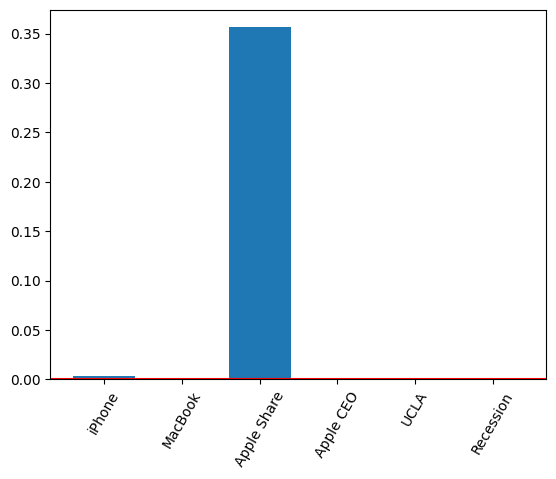

In [143]:
plt.bar(range(len(coefficients)), coefficients) 
plt.xticks(range(len(coefficients)), X.columns, rotation=60)
plt.axhline(0, color='red')
plt.show()

# 5） Does it make sense?

Yes. We can consider the search term "Apple Share" to be the most important when constructing the stock price prediction model. This makes sense because the term "Apple Share" is obviously the most relevant to the movement of apple share price. It is reasonable to be considered as the strongest explanatory variable.